<a href="https://colab.research.google.com/github/buddypia/openai-agents-sdk-colab/blob/master/image_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 画像を説明エージェント

アップロードした画像について説明する

## INPUT
```markdown
うさぎの画像URL
```

## OUTPUT
```markdown
この画像には、白いウサギが写っており、大きなニンジンを持っています。ウサギは草むらの中にいて、背景には明るい自然の風景が広がっています。ウサギの表情はかわいらしく、柔らかそうな毛並みが印象的です。全体的に、春や夏の爽やかな屋外の雰囲気が感じられます。
```

## エージェントフロー図
<img src="https://drive.google.com/uc?id=1BBLB8vAjdGEQJEVANVkQuyl3Vy7ZVeml" alt="ColabにOpenAIのAPIキーの登録" width="30%">

In [ ]:
# Pythonパッケージインストール
!pip install openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata

# ColabのシークレットからOpenAIのAPIキーを取得
OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")

# OpenAIエージェントにAPIキーを設定
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [ ]:
import base64
import requests

# 画像URLから画像をダウンロード
def download_image(image_url: str, filename: str):
    """
    指定されたURLから画像をダウンロードし、指定されたファイル名で保存する。
    成功した場合、保存したファイルの絶対パス (文字列) を返す。
    失敗した場合、None を返す。
    """
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status() # HTTPエラーチェック

        # 'wb' モードでファイルを開き、画像を書き込む
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

        # 保存に成功したら、絶対パスを取得して返す
        absolute_path = os.path.abspath(filename)
        print(f"画像が正常に保存されました。")
        print(f"絶対パス: {absolute_path}")
        return absolute_path

    except requests.exceptions.RequestException as e:
        print(f"エラー: 画像のダウンロードに失敗しました。 URL: {image_url}, Error: {e}")
        return None # 失敗時は None を返す
    except IOError as e:
        print(f"エラー: ファイル '{filename}' への保存に失敗しました。 Error: {e}")
        return None # 失敗時は None を返す
    except Exception as e:
        print(f"予期せぬエラーが発生しました: {e}")
        return None # 失敗時は None を返す

# 画像をbase64にエンコード
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
    return encoded_string


In [ ]:
from agents import Agent, Runner

image_path = download_image("https://drive.google.com/uc?id=1_mpyQmpfkq4c8V5Ceuu-Kfh6C5txk2St", "usagi.jpeg")

画像が正常に保存されました。
絶対パス: /content/usagi.jpeg


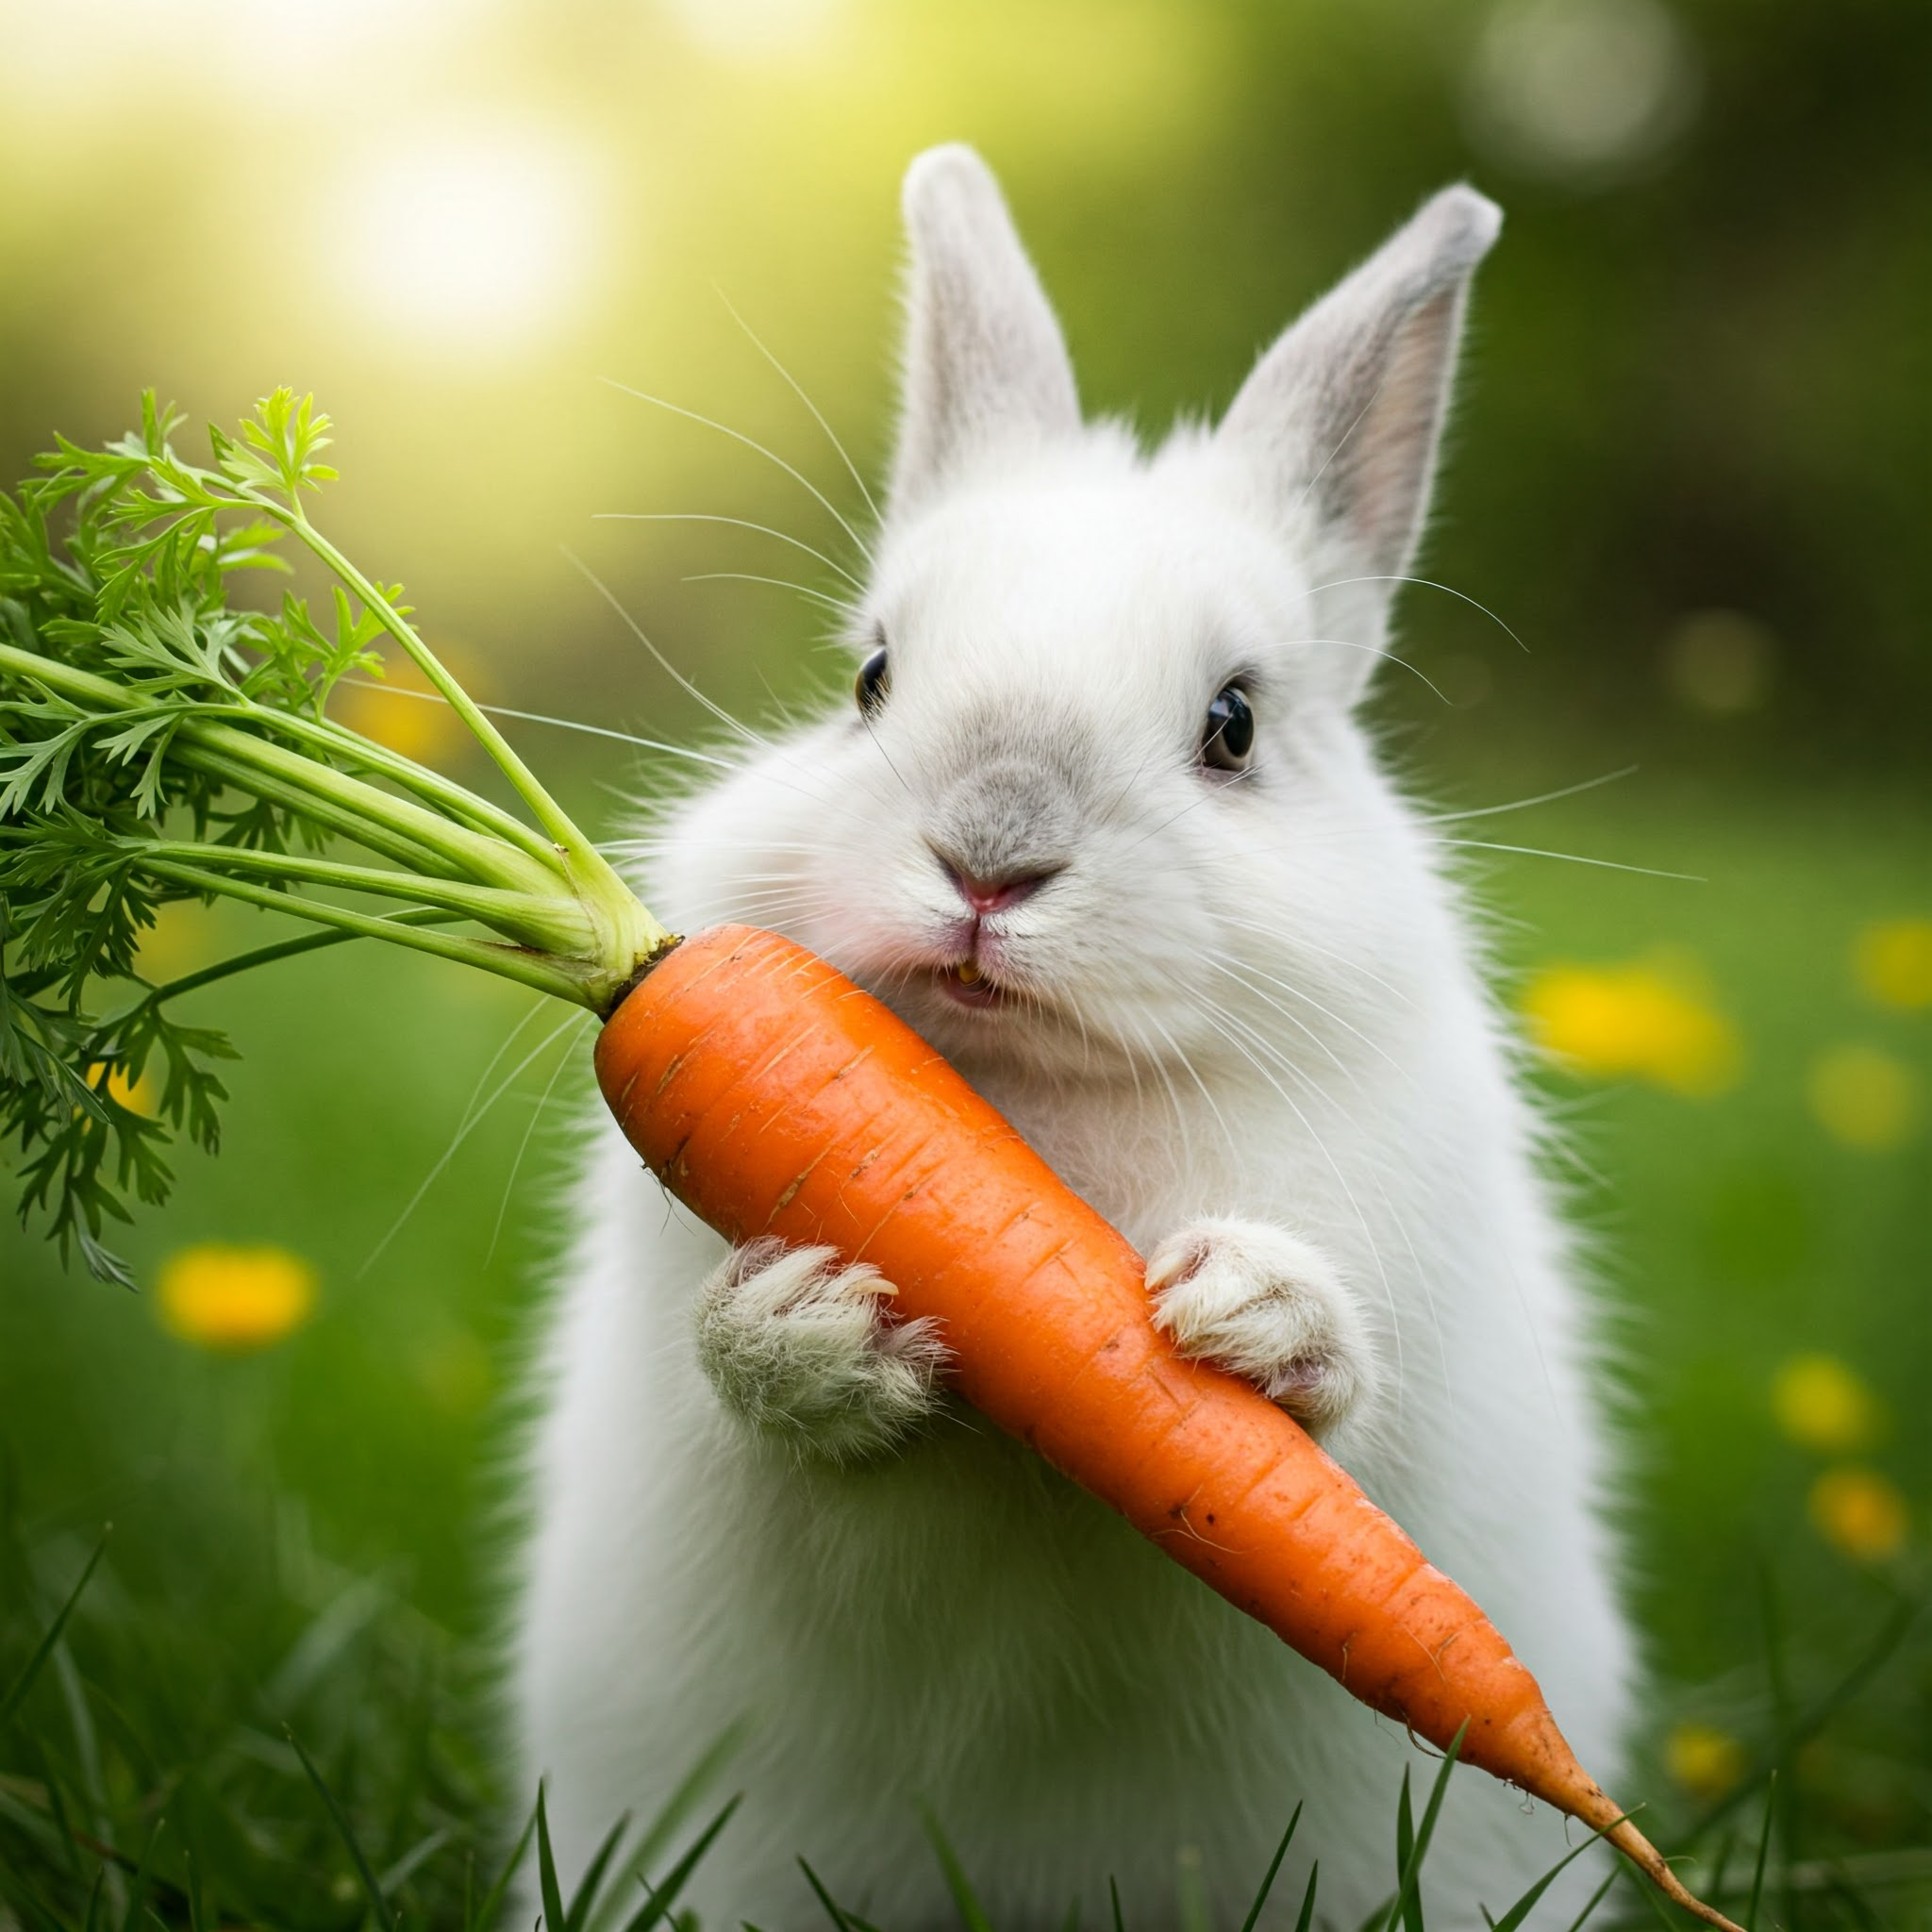

In [ ]:
from IPython.display import Image, display

# ファイルが存在するか確認
if os.path.exists(image_path):
    try:
        # 画像を表示
        display(Image(filename=image_path))
    except Exception as e:
        print(f"エラー: 画像の表示中に問題が発生しました: {e}")
else:
    print(f"エラー: ファイル '{image_path}' が見つかりません。")
    print("Colabの左側のファイルブラウザでパスを確認してください。")


In [ ]:
b64_image = image_to_base64(image_path)

agent = Agent(
    name="Assistant",
    instructions="あなたは画像の内容を理解し、質問に答える親切なアシスタントです。",
)

result = await Runner.run(
    agent,
    [
        {
            "role": "user",
            "content": [
                {
                    "type": "input_image",
                    "detail": "auto",
                    "image_url": f"data:image/jpeg;base64,{b64_image}",
                }
            ],
        },
        {
            "role": "user",
            "content": "この画像には何が写っていますか？詳しく教えてください。",
        },
    ],
)
print(result.final_output)

この画像には、白いウサギが写っており、大きなニンジンを持っています。ウサギは草むらの中にいて、背景には明るい自然の風景が広がっています。ウサギの表情はかわいらしく、柔らかそうな毛並みが印象的です。全体的に、春や夏の爽やかな屋外の雰囲気が感じられます。
